In [1]:
!/opt/homebrew/Cellar/jupyterlab/4.4.0_1/libexec/bin/python -m pip install ucimlrepo


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.0_1/libexec/bin/python -m pip install --upgrade pip


In [2]:
import os

import pandas as pd
import ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, roc_curve)

In [3]:
folder_path = os.path.join("..", "dataset")
data_path = os.path.join(folder_path, "data.csv")
labels_path = os.path.join(folder_path, "labels.csv")

In [4]:
def check_if_dataset_exists():
    data_exists = os.path.exists(data_path)
    labels_exists = os.path.exists(labels_path)
    return data_exists and labels_exists

In [5]:
def read_in_from_csv():
    x = pd.read_csv(data_path, sep=";")
    y = pd.read_csv(labels_path, sep=";")
    return x, y

In [6]:
def save_to_csv(x, y):
    os.makedirs(os.path.dirname(data_path), exist_ok=True)
    os.makedirs(os.path.dirname(labels_path), exist_ok=True)
    x.to_csv(data_path, index=False, sep=";")
    y.to_csv(labels_path, index=False, sep=";")

In [7]:
def fetch_dataset():
    print("Fetching dataset...")
    bank_marketing = fetch_ucirepo(id=222)
    x = bank_marketing.data.features
    y = bank_marketing.data.targets
    save_to_csv(x, y)

    os.makedirs(os.path.dirname(folder_path), exist_ok=True)
    bank_marketing.variables.to_csv(
        os.path.join(folder_path, "variables.csv"), index=False
    )
    return x, y, bank_marketing.variables

In [8]:
dataset_exists = check_if_dataset_exists()

if dataset_exists:
    print("Dataset already exists.")
    x, y = read_in_from_csv()
    variables = pd.read_csv(os.path.join(folder_path, "variables.csv"))
else:
    x, y, variables = fetch_dataset()

Dataset already exists.


In [9]:
variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,NaN,NaN,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-colla...",NaN,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','marri...",NaN,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y'...",NaN,no
4,default,Feature,Binary,NaN,has credit in default?,NaN,no
5,balance,Feature,Integer,NaN,average yearly balance,euros,no
6,housing,Feature,Binary,NaN,has housing loan?,NaN,no
7,loan,Feature,Binary,NaN,has personal loan?,NaN,no
8,contact,Feature,Categorical,NaN,contact communication type (categorical: 'cell...,NaN,yes
9,day_of_week,Feature,Date,NaN,last contact day of the week,NaN,no


In [10]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [11]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


# Data viz

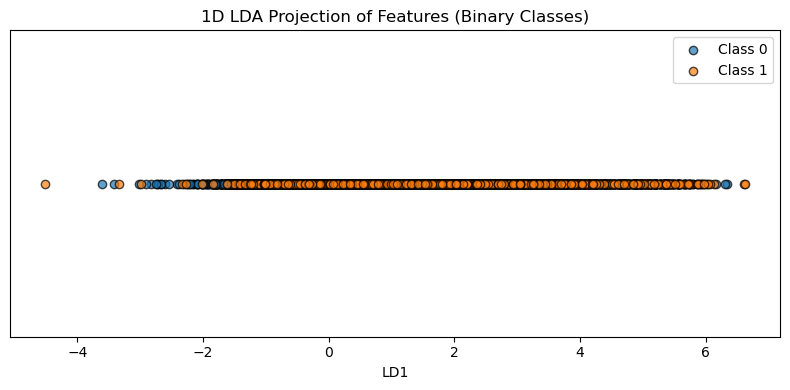

In [63]:
plt.figure(figsize=(8, 4))

# Plot each class separately with label
for class_label in sorted(set(y_train)):
    plt.scatter(
        X_lda[y_train == class_label],
        [0] * sum(y_train == class_label),
        label=f"Class {class_label}",
        edgecolors='k',
        alpha=0.7
    )

plt.xlabel("LD1")
plt.title("1D LDA Projection of Features (Binary Classes)")
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

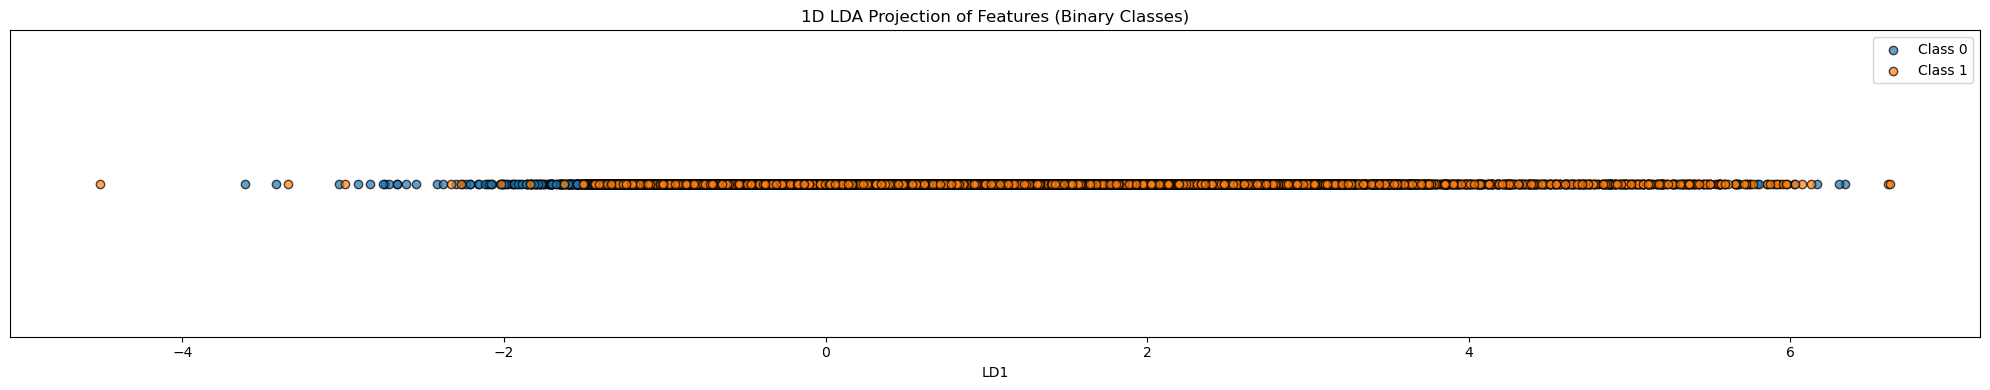

<Figure size 640x480 with 0 Axes>

In [66]:
# LDA plot shows that dataset is not easily linearly seperable
# The classes are not linearly separable in the original feature space.
# The features may not contain enough discriminative information to separate the classes.


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_train, y_train)

plt.figure(figsize=(20, 4))

# Plot each class separately with label
for class_label in sorted(set(y_train)):
    plt.scatter(
        X_lda[y_train == class_label],
        [0] * sum(y_train == class_label),
        label=f"Class {class_label}",
        edgecolors='k',
        alpha=0.7
    )

plt.xlabel("LD1")
plt.title("1D LDA Projection of Features (Binary Classes)")
plt.yticks([])
plt.legend()
plt.tight_layout()

plt.savefig('../images/lda-plot.png', dpi=300, bbox_inches='tight', transparent=True)  # Can also use .jpg, .svg, .pdf, etc.

plt.show()
plt.show()
plt.tight_layout()


# Data preprocessing

In [12]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [13]:
# Why 
# 1. ensures all features constribute equally to penalty if using L1/L2 regularization
# 2. faster convergence
# 3. avoid dominance of on term over others if creating interaction vars 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x[['age', 'balance', 'campaign']] = scaler.fit_transform(x[['age', 'balance', 'campaign']])
x

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,0.519481,management,married,tertiary,no,0.092259,yes,no,NaN,5,may,261,0.000000,-1,0,NaN
1,0.337662,technician,single,secondary,no,0.073067,yes,no,NaN,5,may,151,0.000000,-1,0,NaN
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,NaN,5,may,76,0.000000,-1,0,NaN
3,0.376623,blue-collar,married,NaN,no,0.086476,yes,no,NaN,5,may,92,0.000000,-1,0,NaN
4,0.194805,NaN,single,NaN,no,0.072812,no,no,NaN,5,may,198,0.000000,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,technician,married,tertiary,no,0.080293,no,no,cellular,17,nov,977,0.032258,-1,0,NaN
45207,0.688312,retired,divorced,primary,no,0.088501,no,no,cellular,17,nov,456,0.016129,-1,0,NaN
45208,0.701299,retired,married,secondary,no,0.124689,no,no,cellular,17,nov,1127,0.064516,184,3,success
45209,0.506494,blue-collar,married,secondary,no,0.078868,no,no,telephone,17,nov,508,0.048387,-1,0,NaN


In [14]:
x = pd.get_dummies(x, columns=['job', 'marital', 'contact', 'month'], prefix_sep='_')
x

,age,education,default,balance,housing,loan,day_of_week,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,tertiary,no,0.092259,yes,no,5,261,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
1,0.337662,secondary,no,0.073067,yes,no,5,151,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
2,0.194805,secondary,no,0.072822,yes,yes,5,76,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
3,0.376623,NaN,no,0.086476,yes,no,5,92,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
4,0.194805,NaN,no,0.072812,no,no,5,198,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,tertiary,no,0.080293,no,no,17,977,0.032258,-1,...,False,False,False,False,False,False,False,True,False,False
45207,0.688312,primary,no,0.088501,no,no,17,456,0.016129,-1,...,False,False,False,False,False,False,False,True,False,False
45208,0.701299,secondary,no,0.124689,no,no,17,1127,0.064516,184,...,False,False,False,False,False,False,False,True,False,False
45209,0.506494,secondary,no,0.078868,no,no,17,508,0.048387,-1,...,False,False,False,False,False,False,False,True,False,False


In [15]:
# Binary encode yes/no columns
for col in ['default', 'housing', 'loan']:
    x[col] = x[col].map({'yes': 1, 'no': 0})


In [16]:
x

,age,education,default,balance,housing,loan,day_of_week,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,tertiary,0,0.092259,1,0,5,261,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
1,0.337662,secondary,0,0.073067,1,0,5,151,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
2,0.194805,secondary,0,0.072822,1,1,5,76,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
3,0.376623,NaN,0,0.086476,1,0,5,92,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
4,0.194805,NaN,0,0.072812,0,0,5,198,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,tertiary,0,0.080293,0,0,17,977,0.032258,-1,...,False,False,False,False,False,False,False,True,False,False
45207,0.688312,primary,0,0.088501,0,0,17,456,0.016129,-1,...,False,False,False,False,False,False,False,True,False,False
45208,0.701299,secondary,0,0.124689,0,0,17,1127,0.064516,184,...,False,False,False,False,False,False,False,True,False,False
45209,0.506494,secondary,0,0.078868,0,0,17,508,0.048387,-1,...,False,False,False,False,False,False,False,True,False,False


In [17]:
# ordinal encode 'education' and 'poutcome'

edu_order = ['unknown', 'primary', 'secondary', 'tertiary']
pout_order = ['unknown', 'failure', 'other', 'success']
x['education'] = pd.Categorical(x['education'], categories=edu_order, ordered=True).codes
x['poutcome']  = pd.Categorical(x['poutcome'],  categories=pout_order, ordered=True).codes
x

,age,education,default,balance,housing,loan,day_of_week,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,3,0,0.092259,1,0,5,261,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
1,0.337662,2,0,0.073067,1,0,5,151,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
2,0.194805,2,0,0.072822,1,1,5,76,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
3,0.376623,-1,0,0.086476,1,0,5,92,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
4,0.194805,-1,0,0.072812,0,0,5,198,0.000000,-1,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,3,0,0.080293,0,0,17,977,0.032258,-1,...,False,False,False,False,False,False,False,True,False,False
45207,0.688312,1,0,0.088501,0,0,17,456,0.016129,-1,...,False,False,False,False,False,False,False,True,False,False
45208,0.701299,2,0,0.124689,0,0,17,1127,0.064516,184,...,False,False,False,False,False,False,False,True,False,False
45209,0.506494,2,0,0.078868,0,0,17,508,0.048387,-1,...,False,False,False,False,False,False,False,True,False,False


In [18]:
x = x.drop(columns=['duration'])
x

,age,education,default,balance,housing,loan,day_of_week,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,3,0,0.092259,1,0,5,0.000000,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,0.337662,2,0,0.073067,1,0,5,0.000000,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,0.194805,2,0,0.072822,1,1,5,0.000000,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,0.376623,-1,0,0.086476,1,0,5,0.000000,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,0.194805,-1,0,0.072812,0,0,5,0.000000,-1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,3,0,0.080293,0,0,17,0.032258,-1,0,...,False,False,False,False,False,False,False,True,False,False
45207,0.688312,1,0,0.088501,0,0,17,0.016129,-1,0,...,False,False,False,False,False,False,False,True,False,False
45208,0.701299,2,0,0.124689,0,0,17,0.064516,184,3,...,False,False,False,False,False,False,False,True,False,False
45209,0.506494,2,0,0.078868,0,0,17,0.048387,-1,0,...,False,False,False,False,False,False,False,True,False,False


In [19]:
y["y"] = y["y"].map({'yes': 1, 'no': 0})
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


# Model training

In [20]:
x

,age,education,default,balance,housing,loan,day_of_week,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,3,0,0.092259,1,0,5,0.000000,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,0.337662,2,0,0.073067,1,0,5,0.000000,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,0.194805,2,0,0.072822,1,1,5,0.000000,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,0.376623,-1,0,0.086476,1,0,5,0.000000,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,0.194805,-1,0,0.072812,0,0,5,0.000000,-1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,3,0,0.080293,0,0,17,0.032258,-1,0,...,False,False,False,False,False,False,False,True,False,False
45207,0.688312,1,0,0.088501,0,0,17,0.016129,-1,0,...,False,False,False,False,False,False,False,True,False,False
45208,0.701299,2,0,0.124689,0,0,17,0.064516,184,3,...,False,False,False,False,False,False,False,True,False,False
45209,0.506494,2,0,0.078868,0,0,17,0.048387,-1,0,...,False,False,False,False,False,False,False,True,False,False


In [21]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target DataFrames/Series:

# 1. Split off 20% for test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    x, y,
    test_size=0.20,
    stratify=y,        # maintain class distribution
    random_state=42
)

In [22]:
num_positive = len(y_train_val[y_train_val["y"] == 1])
num_negative = len(y_train_val[y_train_val["y"] == 0])

positive_percentage = round(num_positive * 100 / len(y_train_val), 2)
negative_percentage = round(num_negative * 100 / len(y_train_val), 2)

print(f"Positive Percentage: {positive_percentage}%")
print(f"Negative Percentage: {negative_percentage}%")

Positive Percentage: 11.7%
Negative Percentage: 88.3%


In [23]:
# 2. From the remaining 80%, split 12.5% (0.125) → 10% of overall for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.125,   # 0.125 * 0.80 = 0.10 overall
    stratify=y_train_val,
    random_state=42
)

# 3. Verify the splits
print(f"Train set:      {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape},   {y_val.shape}")
print(f"Test set:       {X_test.shape},  {y_test.shape}")


Train set:      (31647, 39), (31647, 1)
Validation set: (4521, 39),   (4521, 1)
Test set:       (9043, 39),  (9043, 1)


In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=100000, random_state=42)
model.fit(X_train, y_train)

# Evaluate on the validation set
val_accuracy = model.score(X_val, y_val)
print(f"Validation accuracy: {val_accuracy:.4f}")

/opt/homebrew/Cellar/jupyterlab/4.4.0_1/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation accuracy: 0.8885


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_roc_curve(y_prob, y_test):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    
def plot_confusion_matrix(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    classification_report_output = classification_report(y_test, y_pred)
    accuracy_score_lib = accuracy_score(y_test, y_pred)

    tn = cm[0][0]
    tp = cm[1][1]
    fn = cm[1][0]
    fp = cm[0][1]

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=["Predicted: 0", "Predicted: 1"],
        yticklabels=["Actual: 0", "Actual: 1"],
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

    print(classification_report_output)
    print(f"Accuracy (Calculated): {accuracy}")
    print(f"Accuracy (Library): {accuracy_score_lib}")
    print(f"Recall: {recall}")
    print(f"precision: {precision}")

In [26]:
model.predict_proba(X_val)

array([[0.90555818, 0.09444182],
       [0.93299099, 0.06700901],
       [0.88903223, 0.11096777],
       ...,
       [0.919917  , 0.080083  ],
       [0.9521867 , 0.0478133 ],
       [0.89119998, 0.10880002]], shape=(4521, 2))

In [27]:
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]
y_prob

array([0.09444182, 0.06700901, 0.11096777, ..., 0.080083  , 0.0478133 ,
       0.10880002], shape=(4521,))

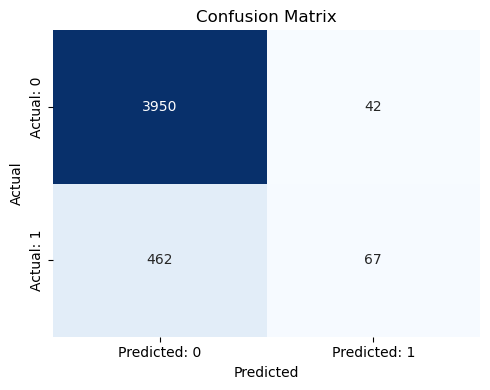

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3992
           1       0.61      0.13      0.21       529

    accuracy                           0.89      4521
   macro avg       0.75      0.56      0.58      4521
weighted avg       0.86      0.89      0.85      4521

Accuracy (Calculated): 0.8885202388852024
Accuracy (Library): 0.8885202388852024
Recall: 0.1266540642722117
precision: 0.6146788990825688


In [28]:
plot_confusion_matrix(y_pred, y_val)

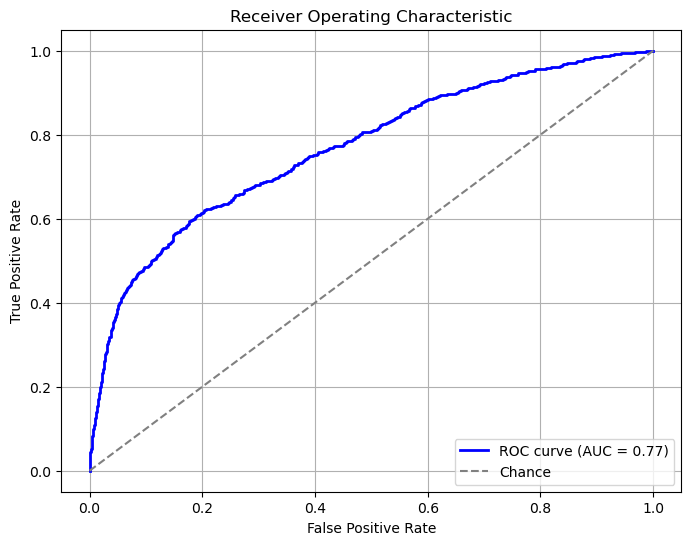

In [29]:
plot_roc_curve(y_prob, y_val)

# Hyperparameter Optimization

In [30]:
X_train

,age,education,default,balance,housing,loan,day_of_week,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
19192,0.506494,2,0,0.083970,0,0,6,0.048387,-1,0,...,False,False,False,False,False,False,False,False,False,False
27678,0.246753,3,0,0.072803,1,0,21,0.032258,175,1,...,False,False,False,False,False,False,False,True,False,False
5279,0.181818,3,0,0.175531,0,0,23,0.000000,-1,0,...,False,False,False,False,False,False,True,False,False,False
16079,0.441558,2,0,0.073757,0,1,22,0.048387,-1,0,...,False,False,False,True,False,False,False,False,False,False
20718,0.428571,1,0,0.088183,0,0,13,0.016129,-1,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28870,0.493506,2,0,0.081628,0,0,30,0.016129,-1,0,...,False,False,True,False,False,False,False,False,False,False
7641,0.246753,2,0,0.076626,0,1,30,0.016129,-1,0,...,False,False,False,False,False,False,True,False,False,False
44542,0.103896,2,0,0.078541,0,0,12,0.032258,181,1,...,False,False,False,False,False,False,False,False,False,False
10753,0.519481,1,0,0.083117,0,0,17,0.032258,-1,0,...,False,False,False,False,True,False,False,False,False,False


In [31]:
y_train = y_train.values.ravel()
y_val   = y_val.values.ravel()
y_test  = y_test.values.ravel()

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# Define a grid of common hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 20],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

# 1. Grid search optimizing for recall
grid_recall = GridSearchCV(
    LogisticRegression(max_iter=10000, random_state=42),
    param_grid,
    scoring='recall',
    cv=5
)
grid_recall.fit(X_train, y_train)
print("Recall-optimized best params:", grid_recall.best_params_)
print("CV recall:", grid_recall.best_score_)

Recall-optimized best params: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
CV recall: 0.636691468796732


In [33]:
# 2. Grid search optimizing for precision
grid_precision = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    scoring='precision',
    cv=5
)
grid_precision.fit(X_train, y_train)
print("Precision-optimized best params:", grid_precision.best_params_)
print("CV precision:", grid_precision.best_score_)

# 3. Evaluate both models on the validation set
for name, model in [
    ('Recall-optimized', grid_recall.best_estimator_),
    ('Precision-optimized', grid_precision.best_estimator_)
]:
    y_val_pred = model.predict(X_val)
    print(f"\n{name} model validation scores:")
    print("  Recall   :", recall_score(y_val, y_val_pred))
    print("  Precision:", precision_score(y_val, y_val_pred))

Precision-optimized best params: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
CV precision: 0.6495893060354012

Recall-optimized model validation scores:
  Recall   : 0.6446124763705104
  Precision: 0.2558139534883721

Precision-optimized model validation scores:
  Recall   : 0.12098298676748583
  Precision: 0.6956521739130435


In [34]:
# 3. Grid search optimizing for f1 score
grid_f1 = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    scoring='f1',
    cv=5
)
grid_f1.fit(X_train, y_train)
print("F1-optimized best params:", grid_precision.best_params_)
print("CV F1:", grid_precision.best_score_)

F1-optimized best params: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
CV F1: 0.6495893060354012


## Eval Best Model

In [35]:
best_model = grid_f1.best_estimator_
best_model

LogisticRegression(C=10, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='liblinear')

In [36]:
y_pred = best_model.predict(X_val)
y_prob = best_model.predict_proba(X_val)[:, 1]
y_prob

array([0.41178711, 0.36094953, 0.46570589, ..., 0.39227436, 0.27823789,
       0.47890148], shape=(4521,))

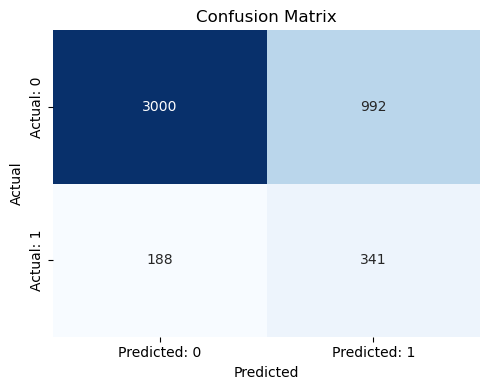

              precision    recall  f1-score   support

           0       0.94      0.75      0.84      3992
           1       0.26      0.64      0.37       529

    accuracy                           0.74      4521
   macro avg       0.60      0.70      0.60      4521
weighted avg       0.86      0.74      0.78      4521

Accuracy (Calculated): 0.738995797389958
Accuracy (Library): 0.738995797389958
Recall: 0.6446124763705104
precision: 0.2558139534883721


In [37]:
plot_confusion_matrix(y_pred, y_val)

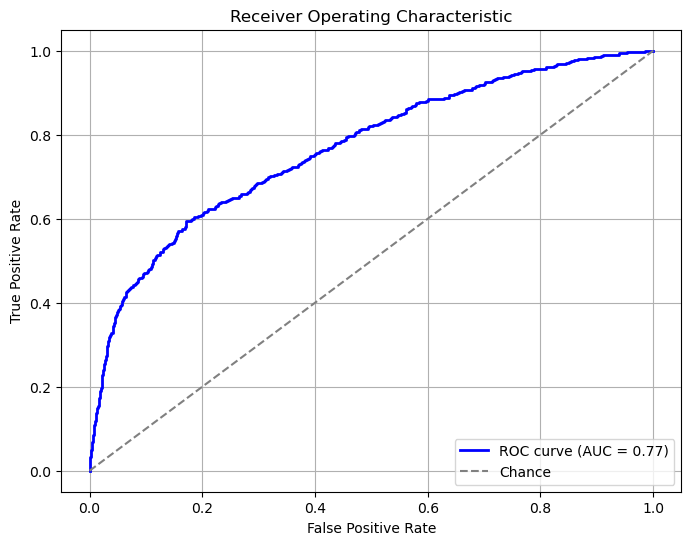

In [38]:
plot_roc_curve(y_prob, y_val)

In [39]:
best_model = grid_precision.best_estimator_
best_model

LogisticRegression(C=0.01, max_iter=1000, random_state=42, solver='liblinear')

In [40]:
y_pred = best_model.predict(X_val)
y_prob = best_model.predict_proba(X_val)[:, 1]
y_prob

array([0.059561  , 0.07567637, 0.11506227, ..., 0.08384332, 0.05202863,
       0.15623502], shape=(4521,))

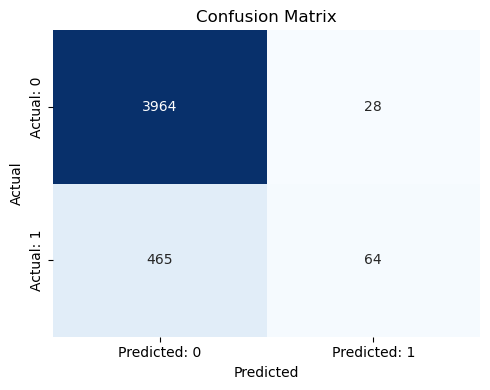

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3992
           1       0.70      0.12      0.21       529

    accuracy                           0.89      4521
   macro avg       0.80      0.56      0.57      4521
weighted avg       0.87      0.89      0.86      4521

Accuracy (Calculated): 0.8909533289095333
Accuracy (Library): 0.8909533289095333
Recall: 0.12098298676748583
precision: 0.6956521739130435


In [41]:
plot_confusion_matrix(y_pred, y_val)

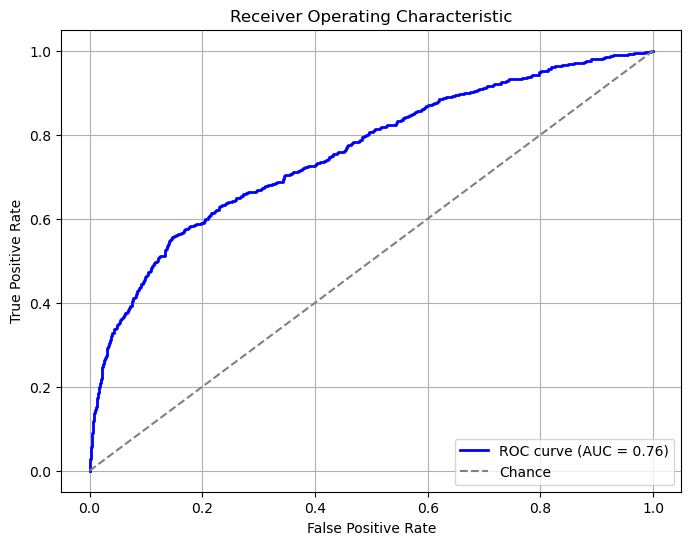

In [42]:
plot_roc_curve(y_prob, y_val)

# Model Viz

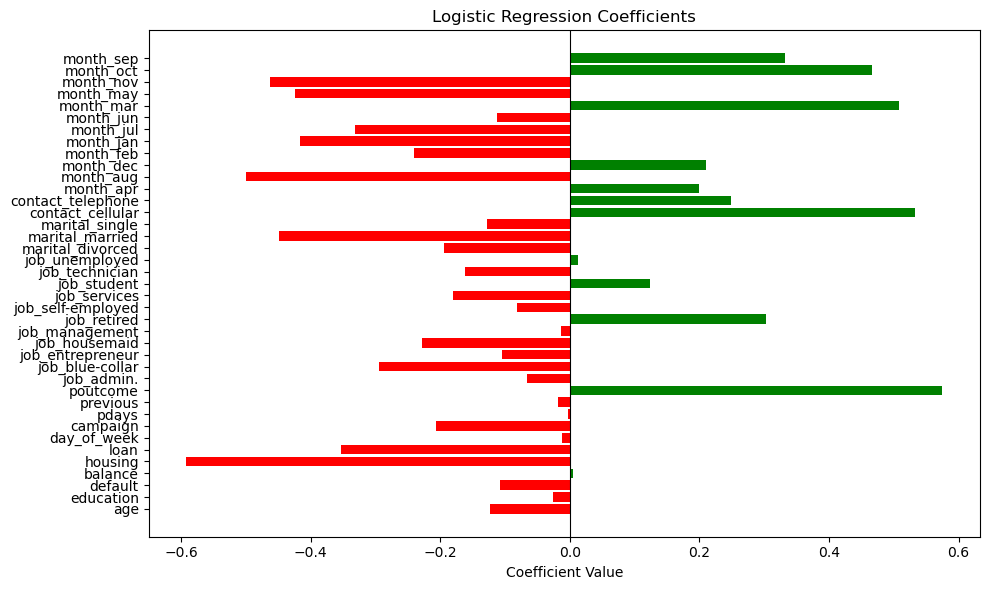

In [43]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = best_model.coef_[0]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color=['green' if c > 0 else 'red' for c in coefficients])
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [45]:
from sklearn.decomposition import PCA


In [48]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_val)

# Create meshgrid in PCA space
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))



/opt/homebrew/Cellar/jupyterlab/4.4.0_1/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


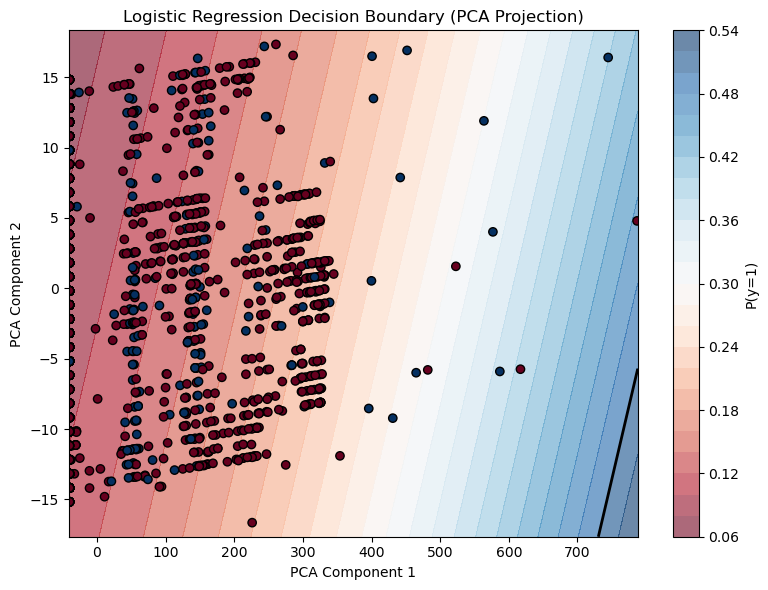

In [50]:
# Map meshgrid points back to original feature space
grid_pca = np.c_[xx.ravel(), yy.ravel()]
grid_original_space = pca.inverse_transform(grid_pca)

# Predict probabilities in original feature space
Z_pca = best_model.predict_proba(grid_original_space)[:, 1]
Z_pca = Z_pca.reshape(xx.shape)

# Plot decision boundary in PCA space
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_pca, levels=25, cmap="RdBu", alpha=0.6)
plt.colorbar(label='P(y=1)')
plt.contour(xx, yy, Z_pca, levels=[0.5], linewidths=2, colors='black')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_val, cmap="RdBu", edgecolors='k')
plt.title("Logistic Regression Decision Boundary (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()
plt.show()